# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [5]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [51]:
# Dataset url
url = "./datasets/SyntheticData4Clustering_X.csv"

# Load the dataset
df  = pd.read_csv(url)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [52]:
# Print the dataframe
df

,x1,x2,x3,x4,x5,x6
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334
...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975


In [20]:
# get the number of observations and variables
observations = df.shape[0]
print("Observations: " + str(observations))

variables = df.shape[1]
print("Variables: " + str(variables))

Observations: 1024
Variables: 6


2. Drop rows with any missing values


In [21]:
# Drop rows with NaN values if existing
df.isnull().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
dtype: int64

3. Scatterplot




<AxesSubplot: xlabel='x1', ylabel='x2'>

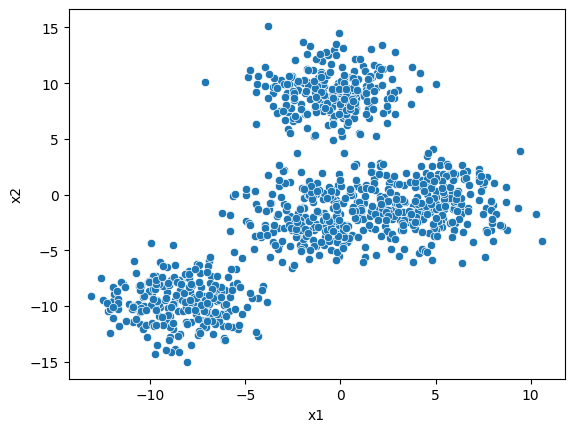

In [32]:
# Scatterplot of x1 and x2
sns.scatterplot(data=df, x = "x1", y = "x2")


<AxesSubplot: xlabel='x1', ylabel='x3'>

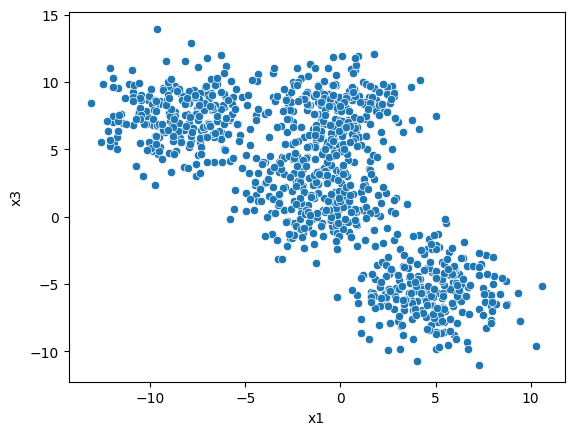

In [33]:
# Scatterplot of x1 and x3
sns.scatterplot(data=df, x = "x1", y = "x3")

Difficult to plot independetly all combinations, let's use pairplot

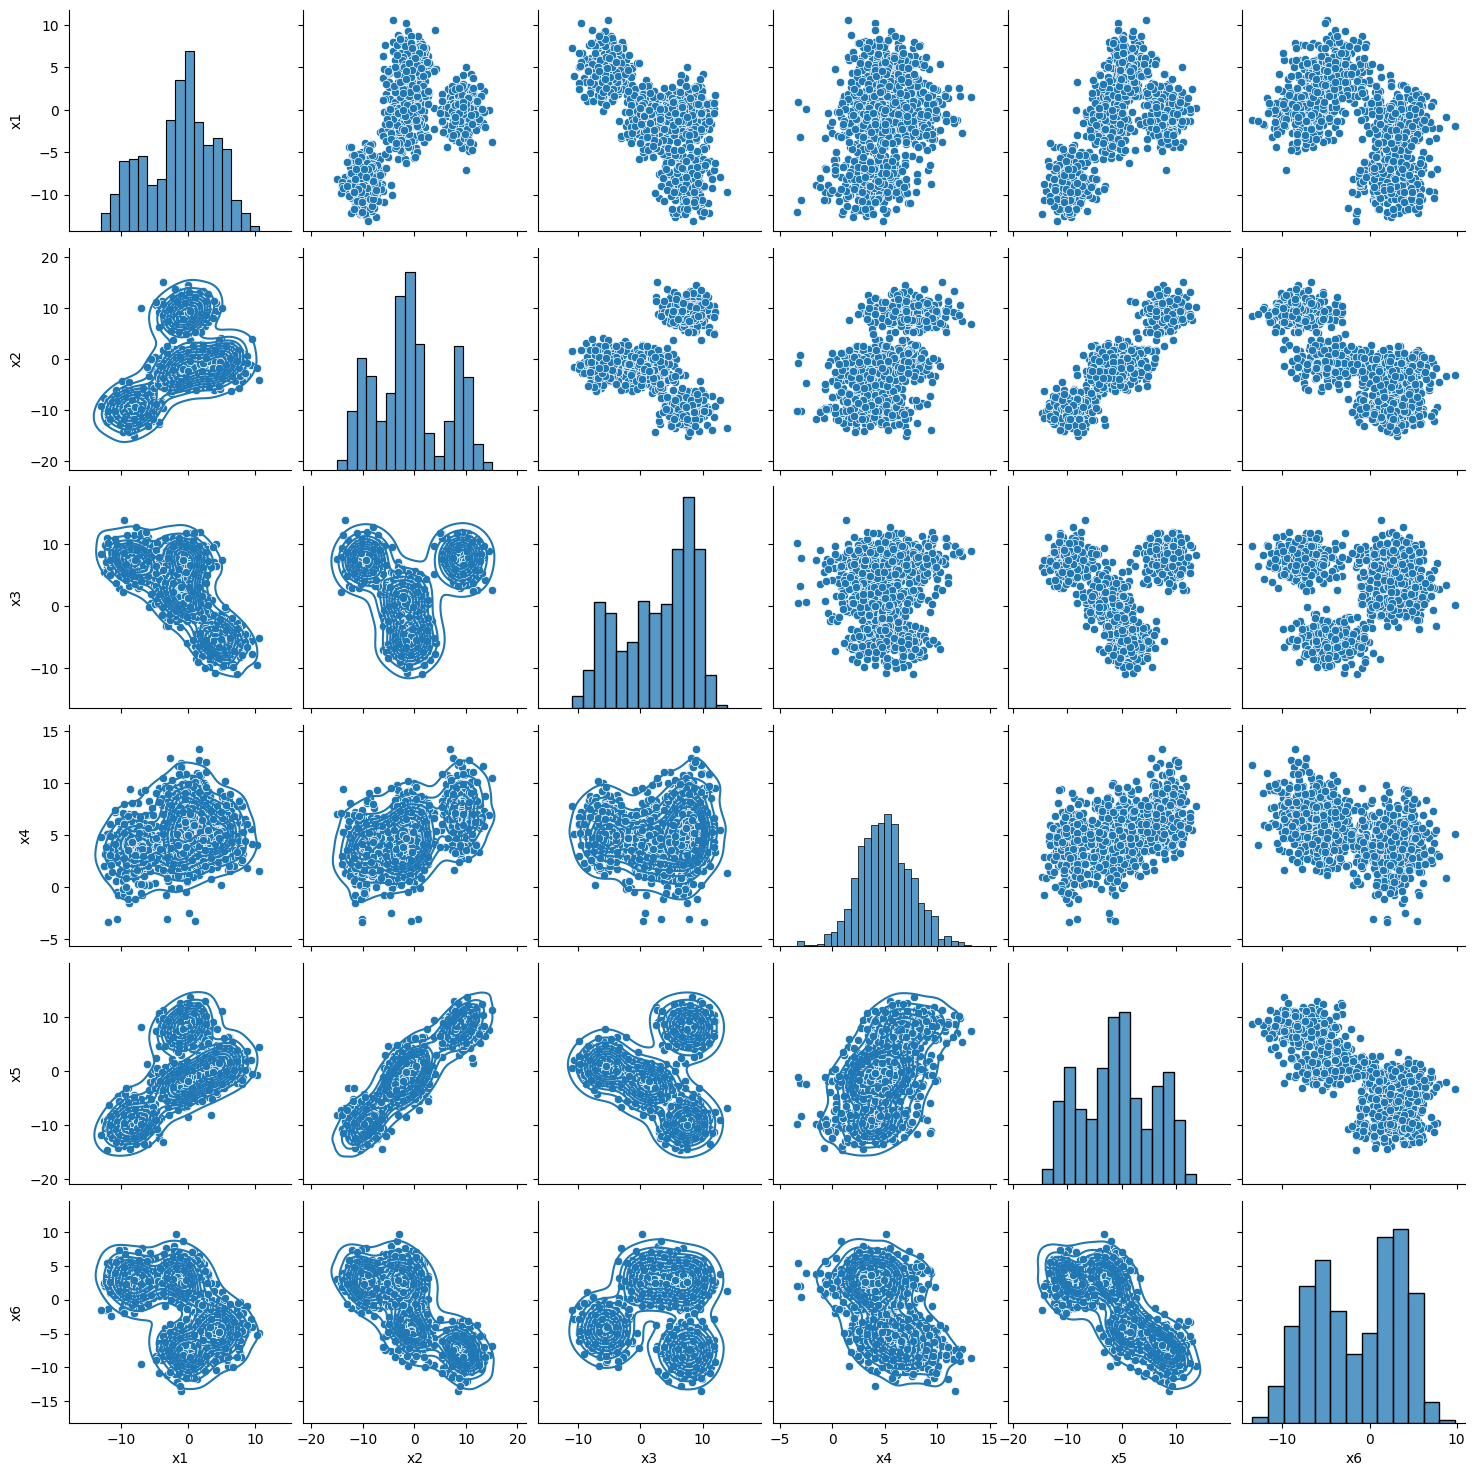

In [45]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(data=df)
g.map_lower(sns.kdeplot)

It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering

In [156]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K = 4  # Let's assume there are 2,3,4,5...? clusters/groups

# Create the kmeans object
km = KMeans(n_clusters=K, n_init="auto")

yestimated = km.fit_predict(df)

yestimated

array([3, 2, 2, ..., 2, 0, 0], dtype=int32)

In [94]:
# Add a new column to the dataset with the cluster information
df['yestimated'] = yestimated

In [95]:
# Laber of the estimated clusters
df.head()

,x1,x2,x3,x4,x5,x6,yestimated
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978,1
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122,0
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397,0
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542,0
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334,2


In [157]:
# Cluster centroides
df.yestimated.unique()

km.cluster_centers_

array([[ 4.75634768, -0.75290959, -5.5798822 ,  5.20729319,  1.024779  ,
        -4.30453201,  2.        ],
       [-8.40571071, -9.65151928,  7.45044683,  3.77380481, -9.50855366,
         2.66099801,  3.        ],
       [-0.44229417,  9.13121533,  7.61409814,  7.22984721,  8.13001382,
        -7.6264221 ,  0.        ],
       [-1.11162986, -1.97482508,  1.3833106 ,  3.93069765, -2.6359108 ,
         3.22632658,  1.        ]])

In [97]:
# Sum of squared error (sse) of the final model
km.inertia_

24433.198599953863

In [98]:
# The number of iterations required to converge
km.n_iter_

3

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

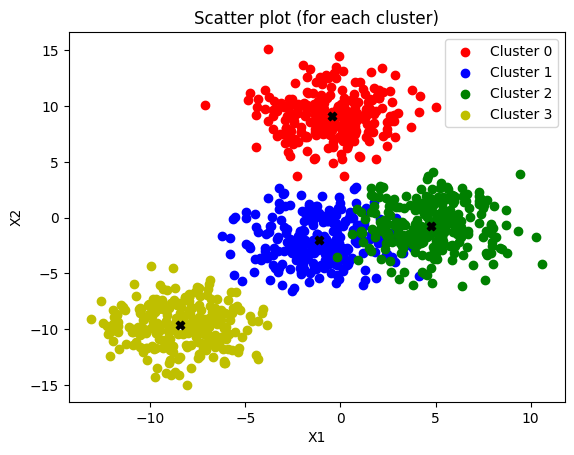

In [127]:
# Get a dataframe with the data of each clsuter
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
df3 = df[df.yestimated==2]
df4 = df[df.yestimated==3]

# Scatter plot of each cluster
plt.scatter(df1.x1, df1.x2, label = "Cluster 0", c = 'r')
plt.scatter(df2.x1, df2.x2, label = "Cluster 1", c = 'b')
plt.scatter(df3.x1, df3.x2, label = "Cluster 2", c = 'g')
plt.scatter(df4.x1, df4.x2, label = "Cluster 3", c = 'y')

# Plot centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='X')
plt.title("Scatter plot (for each cluster)")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()


# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

<AxesSubplot: >

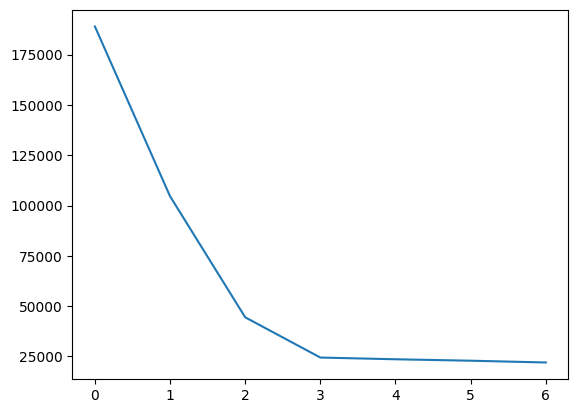

In [128]:
# Intialize a list to hold sum of squared error (sse)

vec = []
for i in range(1, 8):
    km = KMeans(n_clusters=i, n_init="auto")

    yestimated = km.fit_predict(df)

    vec.append(km.inertia_)

sns.lineplot(data=vec)
# For each k


Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Observations?



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: 


1. Repeat this analysis using other pair of features, e.g., x3 and x6

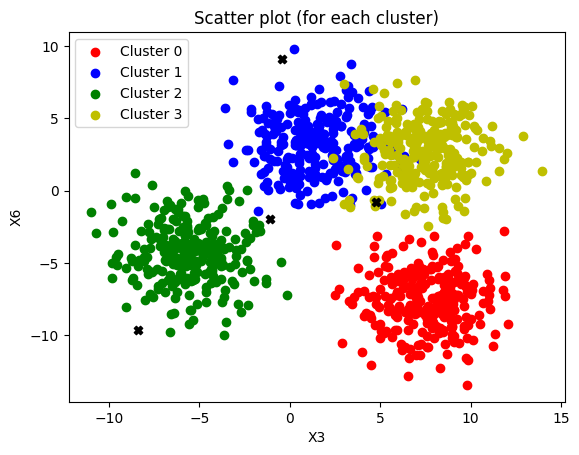

In [158]:
# Get a dataframe with the data of each clsuter
df1 = df[df.yestimated==0]
df2 = df[df.yestimated==1]
df3 = df[df.yestimated==2]
df4 = df[df.yestimated==3]

# Scatter plot of each cluster
plt.scatter(df1.x3, df1.x6, label = "Cluster 0", c = 'r')
plt.scatter(df2.x3, df2.x6, label = "Cluster 1", c = 'b')
plt.scatter(df3.x3, df3.x6, label = "Cluster 2", c = 'g')
plt.scatter(df4.x3, df4.x6, label = "Cluster 3", c = 'y')

# Plot centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='X')
plt.title("Scatter plot (for each cluster)")
plt.xlabel('X3')
plt.ylabel('X6')
plt.legend()

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

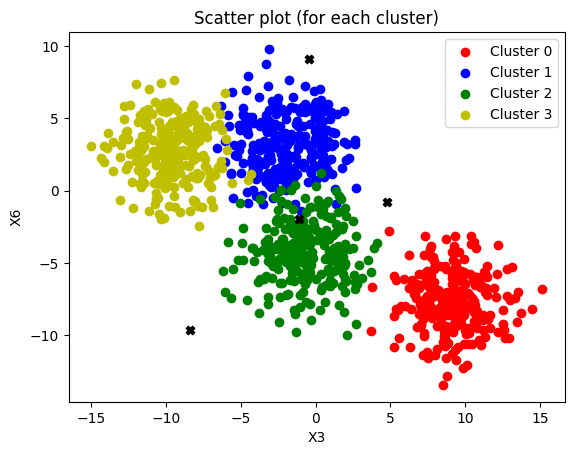

In [159]:
plt.scatter(df1.x2, df1.x6, label = "Cluster 0", c = 'r')
plt.scatter(df2.x2, df2.x6, label = "Cluster 1", c = 'b')
plt.scatter(df3.x2, df3.x6, label = "Cluster 2", c = 'g')
plt.scatter(df4.x2, df4.x6, label = "Cluster 3", c = 'y')

# Plot centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='X')
plt.title("Scatter plot (for each cluster)")
plt.xlabel('X3')
plt.ylabel('X6')
plt.legend()

3. Provide conclusions
   1. Ante esto, 

# Activity: work with the iris dataset


1. Do clustering with the iris flower dataset to form clusters using as features the four features

In [91]:
urlIris = "./datasets/iris/iris.csv"

irisCol = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'classOfFlower']
irisDf = pd.read_csv(urlIris, names=irisCol)

irisDf

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,classOfFlower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Scatter plot

<AxesSubplot: xlabel='sepal width in cm', ylabel='petal width in cm'>

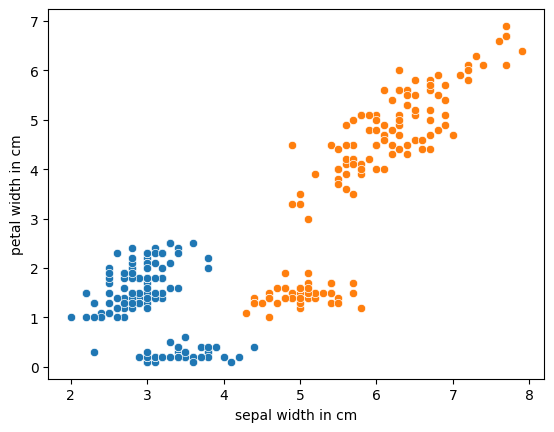

In [67]:
sns.scatterplot(data=irisDf, x = "sepal width in cm", y = "petal width in cm")
sns.scatterplot(data=irisDf, x = "sepal length in cm", y = "petal length in cm")

In [68]:
irisDf.drop("classOfFlower", axis=1, inplace = True)

In [70]:
from sklearn.cluster import KMeans
K = 3
# Create the kmeans object
kmI = KMeans(n_clusters=2, n_init="auto")

yestimated = kmI.fit_predict(irisDf)



In [71]:
irisDf['yestimated'] = yestimated
kmI.n_iter_

2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


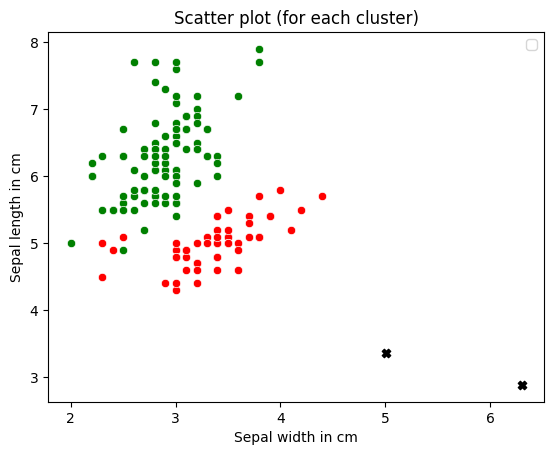

In [72]:
# Get a dataframe with the data of each clsuter
df1 = irisDf[irisDf.yestimated==0]
df2 = irisDf[irisDf.yestimated==1]
df3 = irisDf[irisDf.yestimated==2]

# Scatter plot of each cluster
sns.scatterplot(data=df1, x="sepal width in cm", y="sepal length in cm", color="red")
sns.scatterplot(data=df2, x="sepal width in cm", y="sepal length in cm", color="green")
sns.scatterplot(data=df3, x="sepal width in cm", y="sepal length in cm", color="blue")

# Plot centroids

plt.scatter(kmI.cluster_centers_[:,0], kmI.cluster_centers_[:,1], color='black', marker='X')
plt.title("Scatter plot (for each cluster)")
plt.xlabel('Sepal width in cm')
plt.ylabel('Sepal length in cm')
plt.legend()



2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features


In [78]:
petalDf = irisDf
#petalDf.drop("sepal length in cm", axis=1, inplace = True)
#petalDf.drop("sepal width in cm", axis=1, inplace = True)
#petalDf.drop("yestimated", axis=1, inplace = True)
petalDf

,petal length in cm,petal width in cm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [84]:
from sklearn.cluster import KMeans
K = 3
# Create the kmeans object
kmP = KMeans(n_clusters=2, n_init="auto")

yestimated = kmP.fit_predict(petalDf)

In [85]:
petalDf['yestimated'] = yestimated
kmP.n_iter_

2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


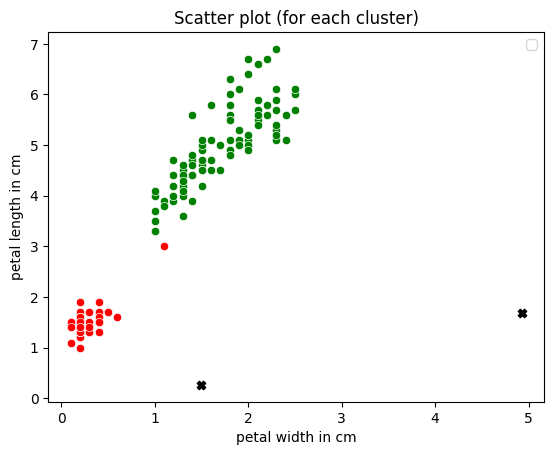

In [88]:
# Get a dataframe with the data of each clsuter
df1 = petalDf[petalDf.yestimated==0]
df2 = petalDf[petalDf.yestimated==1]
df3 = petalDf[petalDf.yestimated==2]

# Scatter plot of each cluster
sns.scatterplot(data=df1, x="petal width in cm", y="petal length in cm", color="red")
sns.scatterplot(data=df2, x="petal width in cm", y="petal length in cm", color="green")
sns.scatterplot(data=df3, x="petal width in cm", y="petal length in cm", color="blue")

# Plot centroids

plt.scatter(kmP.cluster_centers_[:,0], kmP.cluster_centers_[:,1], color='black', marker='X')
plt.title("Scatter plot (for each cluster)")
plt.xlabel('petal width in cm')
plt.ylabel('petal length in cm')
plt.legend()


3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features


In [94]:
sepalDf = irisDf.copy()
sepalDf.drop("petal length in cm", axis=1, inplace = True)
sepalDf.drop("petal width in cm", axis=1, inplace = True)
sepalDf.drop("classOfFlower", axis=1, inplace = True)
sepalDf

,sepal length in cm,sepal width in cm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [95]:
from sklearn.cluster import KMeans
K = 3
# Create the kmeans object
kmS = KMeans(n_clusters=2, n_init="auto")

yestimated = kmS.fit_predict(sepalDf)

In [96]:
sepalDf['yestimated'] = yestimated
kmS.n_iter_

5

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


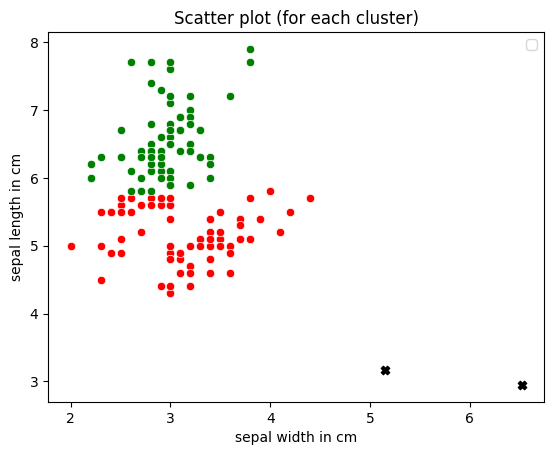

In [97]:
# Get a dataframe with the data of each clsuter
df1 = sepalDf[sepalDf.yestimated==0]
df2 = sepalDf[sepalDf.yestimated==1]
df3 = sepalDf[sepalDf.yestimated==2]

# Scatter plot of each cluster
sns.scatterplot(data=df1, x="sepal width in cm", y="sepal length in cm", color="red")
sns.scatterplot(data=df2, x="sepal width in cm", y="sepal length in cm", color="green")
sns.scatterplot(data=df3, x="sepal width in cm", y="sepal length in cm", color="blue")

# Plot centroids

plt.scatter(kmS.cluster_centers_[:,0], kmS.cluster_centers_[:,1], color='black', marker='X')
plt.title("Scatter plot (for each cluster)")
plt.xlabel('sepal width in cm')
plt.ylabel('sepal length in cm')
plt.legend()


4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics
